In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u

import sys
sys.path.insert(0, '../')

In [2]:
#from libra import flare_flux

times = np.linspace(100, 110, 1000)

time_at_peak_flux = 104.3
maximum_flux = 0.5
duration_fwhm = 1

#fluxes = flare_flux(times, time_at_peak_flux, maximum_flux, duration_fwhm)

#plt.plot(times, fluxes)

## What about wavelength dependence? 

Suzanne says you can assume the flare has the spectrum of an A star momentarily, with $T_\mathrm{eff} \sim 10000$ K.

Assuming we're in the Rayleigh-Jean's limit for the A star, let's assume it's a blackbody. 

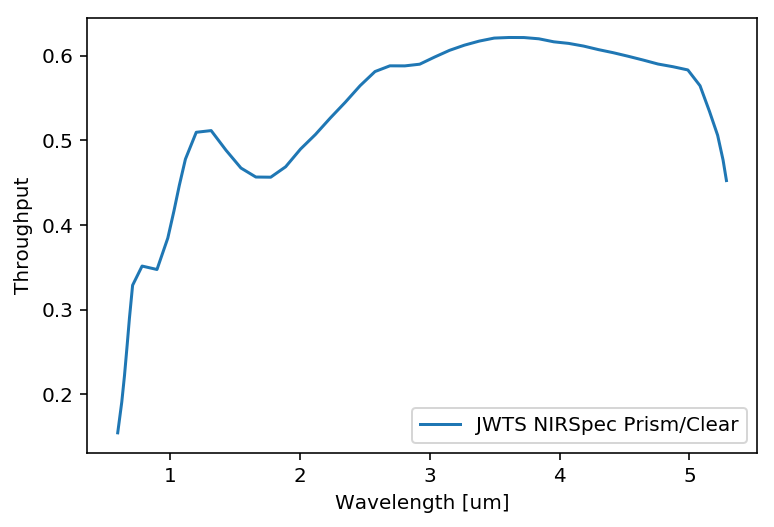

In [3]:
jwst_wl, jwst_throughput = np.loadtxt('../libra/data/etc/NIRSpec_S1600_prism_clear_throughput.csv', 
                                      delimiter=',', unpack=True)
jwst_wl *= u.um

plt.plot(jwst_wl, jwst_throughput, label='JWTS NIRSpec Prism/Clear')

plt.legend()
plt.gca().set(xlabel='Wavelength [um]', ylabel='Throughput');

In [4]:
# from astropy.modeling.blackbody import blackbody_lambda


# bb = blackbody_lambda(jwst_wl, 10000*u.K)
# print(bb.unit)
# plt.semilogy(jwst_wl, bb)

## <a href="#ffd">Observed TRAPPIST-1 flare frequency</a>

In [5]:
_, log_e, log_ed, log_nu = np.loadtxt('../libra/data/flares/trappist1_ffd_davenport.csv', 
                                      unpack=True, delimiter=',', skiprows=1)

[Text(0,0.5,'log freqency [1/day]'), Text(0.5,0,'Log equivalent dur (s)')]

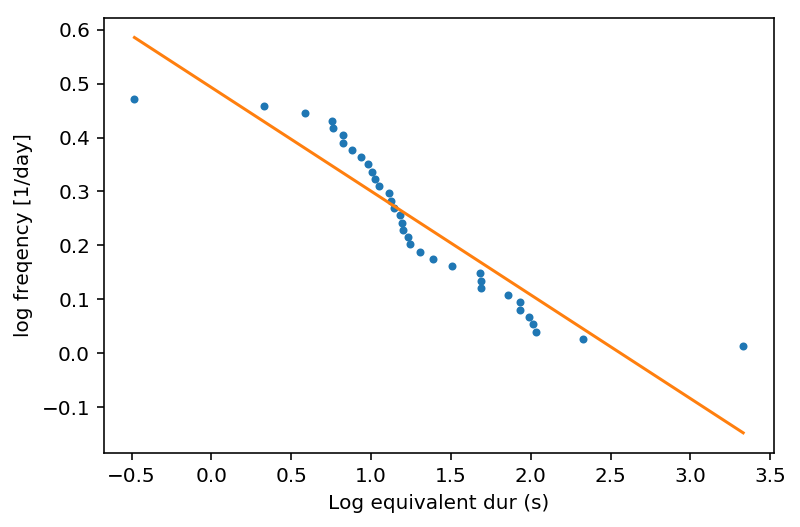

In [6]:
fig, ax = plt.subplots()
ax.plot(log_ed, log_nu, '.')

p = np.polyfit(log_ed, log_nu, 1)

p_inv = np.polyfit(log_nu, log_ed, 1)

log_nu_fit = np.polyval(p, log_ed)

ax.plot(log_ed, log_nu_fit)

ax.set(xlabel='Log equivalent dur (s)', ylabel='log freqency [1/day]')

In [7]:
# Observe flares over 1 day: 
observation_duration = 2 * u.day
# observed_flares = get_flares(observation_duration)

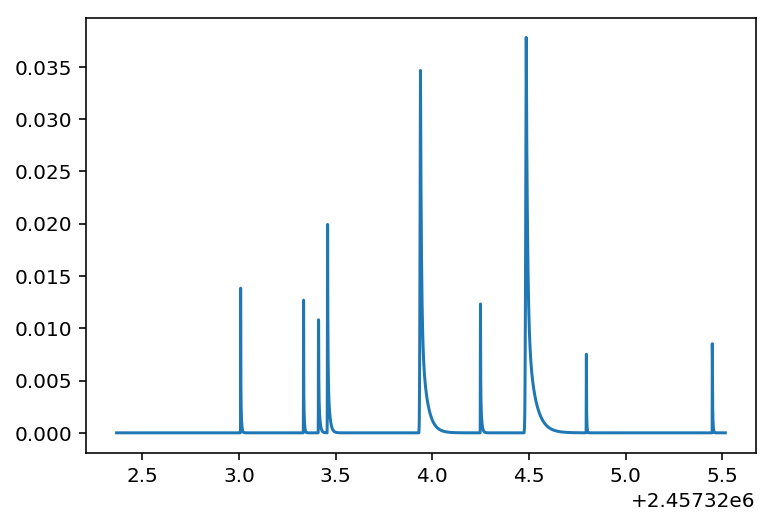

In [12]:
from libra import sample_flares, trappist1

times = np.arange(trappist1('b').t0 - 0.15, trappist1('b').t0 + 3, 1/60/24)

fluxes = sample_flares(times)

plt.plot(times, fluxes)